# Introduction
```
Author: Roy Wilds
Created: December 28, 2020
Description: Common usage patterns for observational data (columns are observational occurences, rows are numerical). For example, having a multi-stage learning pipeline (cols are stages) and rows are the runtimes for different runs.
```

In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

Create an example dataframe that captures the scenario outlined in the Introduction. We'll use a simple CSV file. This data could be the runtimes observed (3 rows, so 3 observations) of the time taken to complete the stages of a computational pipeline.

In [59]:
df = pd.read_csv('../data/observations.csv')
df.head(3)

,Run,Stage1,Stage2,Stage3
0,1,1.45,3.55,6.89
1,2,1.15,2.06,5.82
2,3,2.82,2.96,6.01


The first thing to keep in mind is that although the above representation seems natural (cols = stages, rows = observations) we can also represent the same information as follows.

Observe that we really only have 1 numeric variable: the runtime. As such we can reshape the dataframe so that we have that numeric variable in its own column, and then we can indicate the stage the runtime is for in another column.

The `melt` function from pandas makes this really easy.

In [60]:
df_reshape = pd.melt(df, id_vars='Run')
df_reshape.head(10)

,Run,variable,value
0,1,Stage1,1.45
1,2,Stage1,1.15
2,3,Stage1,2.82
3,4,Stage1,2.22
4,1,Stage2,3.55
5,2,Stage2,2.06
6,3,Stage2,2.96
7,4,Stage2,3.17
8,1,Stage3,6.89
9,2,Stage3,5.82


We can update the column names to make things more clear

In [61]:
df_reshape.columns=['Run','Stage','Runtime']
df_reshape.head()

,Run,Stage,Runtime
0,1,Stage1,1.45
1,2,Stage1,1.15
2,3,Stage1,2.82
3,4,Stage1,2.22
4,1,Stage2,3.55


Now we have an easily plottable dataframe.

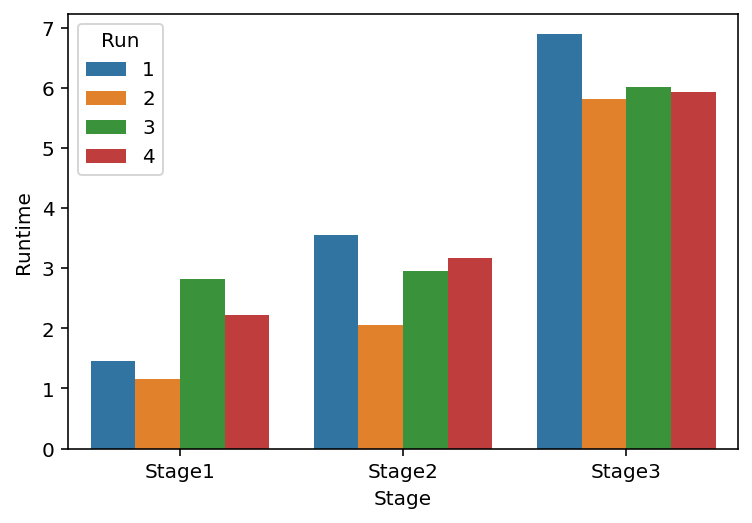

In [62]:
plt.figure()
ax = sns.barplot(data=df_reshape, x="Stage", y="Runtime", hue="Run")
plt.show()

There are many many customizations you can apply to this plot, such as the spacing, colormap, etc. But, this is a quick way to be able to see the variation of a numeric variable (runtime) for different categorical values (stages) over several observations (runs).

Now, what if we had say 100 runs? Showing a grouped plot wouldn't be a good idea. Likely we'd rather show a statistical summary of the runs, such as the average across all runs and some representation of the variation across runs.

Seaborn/Matplotlib provide a handy default way to see this. Just remove the `hue` argument and it automatically shows representation of the "centrality" and the variation for each categorical variable (Stage in our case).

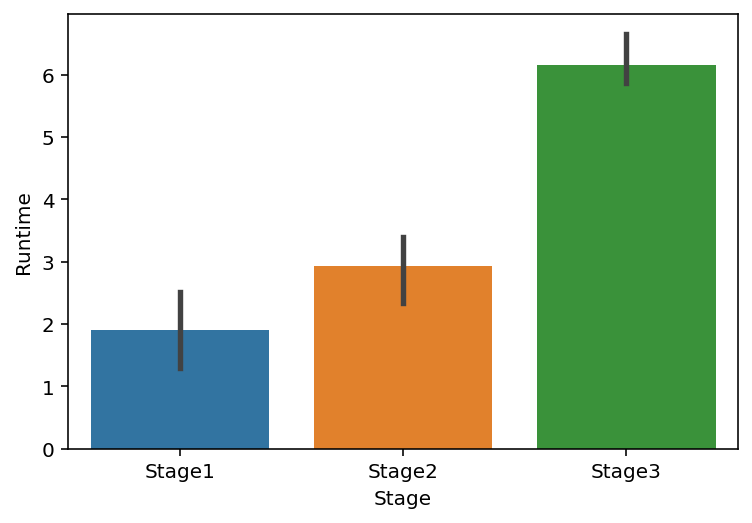

In [63]:
plt.figure()
ax = sns.barplot(data=df_reshape, x="Stage", y="Runtime")
plt.show()

Suppose we wanted to compare our last run with all previous runs? We may want to do this if we were investigating some change in runtime and want to see if something stands out visually.

We can do this be separating that run, and then overlaying another plot onto the barplot as follows. The approach requires a bit more setup for the figure than we had previously.

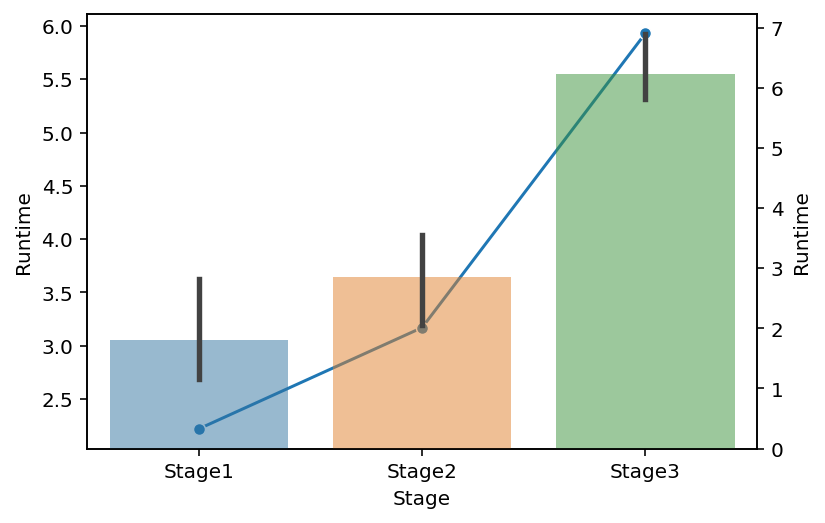

In [64]:
ax1 = sns.set_style(style=None, rc=None)
fig, ax1 = plt.subplots()
sns.lineplot(data=df_reshape[df_reshape['Run'] == 4], x="Stage", y="Runtime", marker='o', ax=ax1)
ax2 = ax1.twinx()
sns.barplot(data=df_reshape[df_reshape['Run'] != 4], x="Stage", y="Runtime", ax=ax2, alpha=0.5)
plt.show()

A few comments
- The `alpha=0.5` makes the barplot transparent so that you can see the lineplot.
- The basic idea for the above construction is to create separate axes for each plot we want. That's why you see `ax1` and `ax2`. Since they have the same x-axis, we can use the `twinx()` function to duplicate it from the first plot we made.

# Miscellaneous
When getting started out, simple differences between your data representation and showing the above graphs can be annoying. 

## Missing an observation column
For example, what if you don't have a `Run` variable explicitly present? Maybe the row itself is implicitly the indicator of the Run (i.e. first data row in the CSV/dataframe is the first run). 

If you remove the `Run` column from our original `df` we loaded then the above steps fail. Why? Because when we used `pd.melt` to reshape our data we had to explicitly present that variable so that our subsequent steps new which column to use. 

Here's a simple fix.

In [65]:
df_norun = pd.read_csv('../data/observations.csv')
df_norun = df_norun.drop('Run', axis=1) # Drop the Run column to emulate us not having it in the first place
df_norun.head()

,Stage1,Stage2,Stage3
0,1.45,3.55,6.89
1,1.15,2.06,5.82
2,2.82,2.96,6.01
3,2.22,3.17,5.93


In [66]:
df_norun['Run'] = np.arange(1,df_norun.shape[0]+1) # We want it to start at 1 for consistency. Default is 0.
df_norun.head()

,Stage1,Stage2,Stage3,Run
0,1.45,3.55,6.89,1
1,1.15,2.06,5.82,2
2,2.82,2.96,6.01,3
3,2.22,3.17,5.93,4


And now we can operate on `df_norun` same as we did for `df` above.